In [ ]:
!pip install librosa

In [52]:
import torchaudio
import torchaudio.transforms as T
import seaborn as sns
import matplotlib.pyplot as plt
import librosa
import torch
import numpy as np
import os
from PIL import Image
import random

## Load dataset from kaggle

In [19]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("kinguistics/heartbeat-sounds")

print("Path to dataset files:", path)

Path to dataset files: /Users/vominhthinh/.cache/kagglehub/datasets/kinguistics/heartbeat-sounds/versions/1


In [ ]:
# explore the dataset structure
print("Nội dung thư mục dataset:")
for root, dirs, files in os.walk(path):
    level = root.replace(path, '').count(os.sep)
    indent = ' ' * 2 * level
    print(f"{indent}{os.path.basename(root)}/")
    subindent = ' ' * 2 * (level + 1)

Nội dung thư mục dataset:
1/
  set_b/
  set_a/


### Only work with set_a

In [ ]:
set_a_path = os.path.join(path, "set_a")
files_in_set_a = []
for file in os.listdir(set_a_path):
    if file.endswith('.wav'):
        files_in_set_a.append(file)

print(f"\nTotal number of file in set A: {len(files_in_set_a)}\n")

print(f"First 10 sample:")
for i in range(0, 10):
    print(files_in_set_a[i])


Total number of file in set A: 176

First 10 sample:
normal__201108011112.wav
Aunlabelledtest__201108222228.wav
artifact__201012172012.wav
extrahls__201104140118.wav
Aunlabelledtest__201106031556.wav
extrahls__201103170134.wav
Aunlabelledtest__201106061215.wav
artifact__201105280851.wav
murmur__201108222256.wav
murmur__201108222242.wav


### EDA

In [ ]:
# let explore in a sample file
wav_file = set_a_path + "/artifact__201106061233.wav"
data_waveform, sr = librosa.load(wav_file, sr=None)  # sr=None to keep the original sample rate

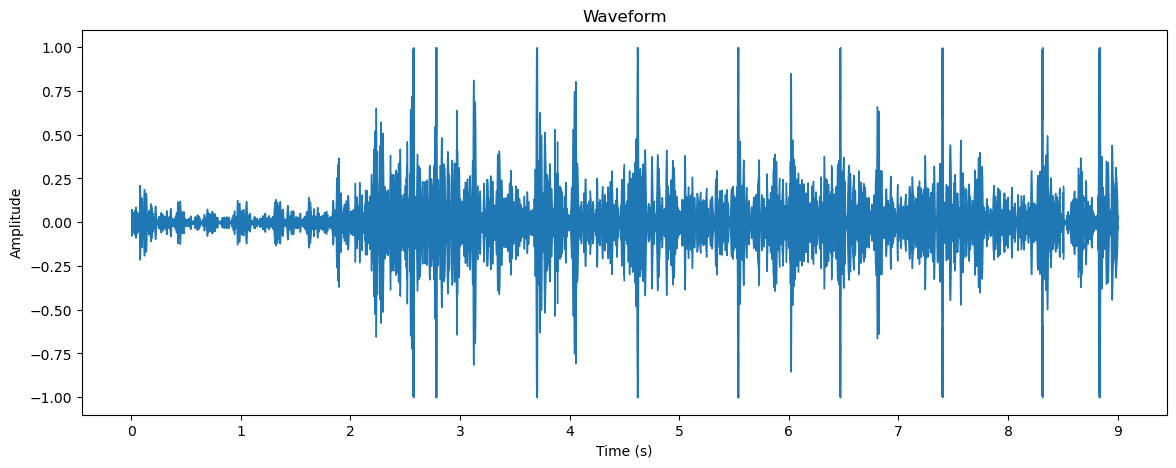

In [36]:
# Plot waveform
plt.figure(figsize=(14, 5))
librosa.display.waveshow(data_waveform, sr=sr)
plt.title('Waveform')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.show()

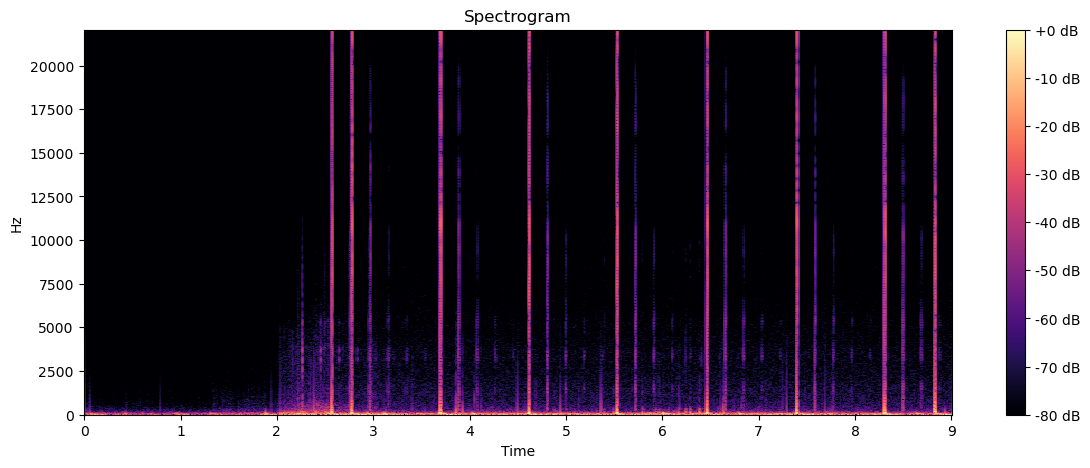

In [ ]:
# Plot spectrogram (use STFT)
D = librosa.stft(data_waveform)
S_db = librosa.amplitude_to_db(abs(D), ref=np.max)

plt.figure(figsize=(14, 5))
librosa.display.specshow(S_db, sr=sr, x_axis='time', y_axis='hz')
plt.colorbar(format="%+2.0f dB")
plt.title('Spectrogram')
plt.show()